In [1]:
import numpy as np
import ceo
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
src = ceo.Source('Vs',rays_box_size=25.5, rays_box_sampling=501,rays_origin=[0,0,25])

In [4]:
gmt = ceo.GMT_MX()

In [6]:
src>>(gmt,)

In [7]:
+src

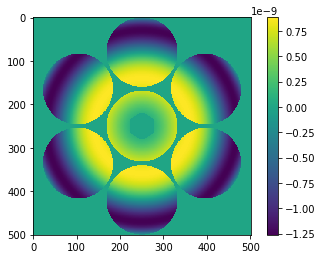

In [8]:
plt.imshow(src.phase.host())
plt.colorbar()

In [9]:
pssn0, pssn_data = gmt.PSSn(src,save=True)
pssn0

1.0

In [10]:
def PSSn(_src_,zen_arcmin):
    _src_.updateDirections(zen_arcmin*ceo.constants.ARCMIN2RAD,0)
    return gmt.PSSn(_src_,**pssn_data)

In [11]:
print([PSSn(src,x) for x in [1.5,5,10]])

[0.98163242645675852, 0.89000321434885898, 0.50876265789069652]


In [12]:
srcH = ceo.Source('H',rays_box_size=25.5, rays_box_sampling=501,rays_origin=[0,0,25])

In [13]:
pssn0, pssn_data = gmt.PSSn(srcH,save=True)
pssn0

1.0

In [15]:
print([PSSn(srcH,x) for x in [1.5,5,10]])

[0.98063379551105823, 0.84523564164797738, 0.35056094697055346]


In [16]:
src.updateDirections(0,0)

In [17]:
pssn0, pssn_data = gmt.PSSn(src,save=True)
pssn0

1.0

In [24]:
state = gmt.state

In [40]:
state['M1']['Txyz'][:,2] = np.random.randn(7)*50e-9
gmt^=state
gmt.PSSn(src,**pssn_data)

0.9999999777068791

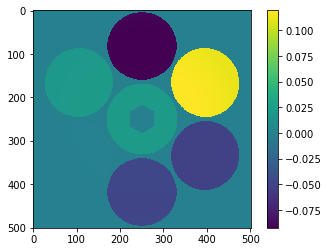

In [41]:
plt.imshow(src.phase.host(units='micron'))
plt.colorbar()